In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import cv2

In [3]:
def plot_stress_strain(strain, stress, i):
    fig, ax = plt.subplots()

    ax.plot(strain, stress, linewidth=2.0)

    ax.set_xlabel('Strain')
    ax.set_ylabel('Stress (GPa)')
    
    #fig.savefig(f'./stress_strain_plots/{i}.png')
    fig.savefig(f'C:/Users/sabri/Desktop/LAMM/leaf_stylegan/GA/stress_strain_GA/stress_strain_{i}.png')
    
    plt.close()

In [4]:
def find_modulus(strain, stress,i):

    strain_index=np.where(strain>0.02)[0][0]
    strain_linreg=strain[0:strain_index]
    stress_linreg=pxx[0:strain_index]

    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(strain_linreg, stress_linreg)
    if r_value**2>0.998:
        return r_value**2, slope
    else:
            strain_index=np.where(strain>0.01)[0][0]
            strain_linreg=strain[0:strain_index]
            stress_linreg=pxx[0:strain_index]

            slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(strain_linreg, stress_linreg)
            if r_value**2>0.99:
                return r_value**2, slope
            else:
                strain_index=np.where(strain>0.005)[0][0]
                strain_linreg=strain[0:strain_index]
                stress_linreg=pxx[0:strain_index]

                slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(strain_linreg, stress_linreg)
                if r_value**2>0.945:
                    return r_value**2, slope
                else:
                    #print(f'Modulus for {i} not found')
                    return r_value**2,0



In [5]:
#filename = 'C:/Users/sabri/Desktop/LAMM/leaf_stylegan/MD/fix_deform_test_100.def1 (6).txt'
filename = 'C:/Users/sabri/Desktop/LAMM/leaf_stylegan/MD/standard/stress_strain_solid.txt'
#filename = 'C:/Users/sabri/Desktop/LAMM/leaf_stylegan/MD/stress_strain/stress_strain_1.txt'
data = np.loadtxt(filename, skiprows=1, dtype='float')
strain=np.array(-data[:,0])
pxx=np.array(-data[:,1])
pyy=np.array(-data[:,2])
pzz=np.array(-data[:,3])
r2, slope=find_modulus(strain, pxx,0)

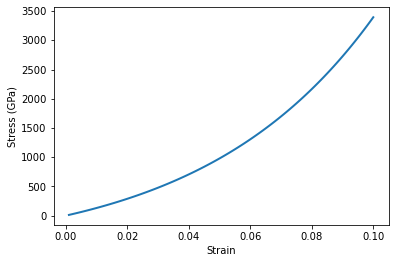

In [176]:
fig, ax = plt.subplots()

ax.plot(strain, pxx, linewidth=2.0)

ax.set_xlabel('Strain')
ax.set_ylabel('Stress (GPa)')
    
plt.show()
    
plt.close()

In [123]:
#Actual modulus

strain_index=np.where(strain>0.005)[0][0]
strain_linreg=strain[0:strain_index]
stress_linreg=pxx[0:strain_index]

#slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(strain_linreg, stress_linreg)

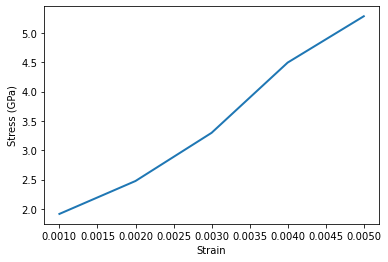

In [127]:
fig, ax = plt.subplots()

ax.plot(strain_linreg, stress_linreg, linewidth=2.0)

ax.set_xlabel('Strain')
ax.set_ylabel('Stress (GPa)')
    
plt.show()
    
plt.close()

In [136]:
modulus_0=[]
faulty_0=[]
folder='rw_cnn'
for i in range(100):
    if os.path.isfile(f'C:/Users/sabri/Desktop/LAMM/leaf_stylegan/GA/stress_strain_{folder}/stress_strain_{i}.txt'):
        filename=f'C:/Users/sabri/Desktop/LAMM/leaf_stylegan/GA/stress_strain_{folder}/stress_strain_{i}.txt'
        data = np.loadtxt(filename, skiprows=1, dtype='float')
        strain=-data[:,0]
        pxx=-data[:,1]
        pyy=-data[:,2]
        pzz=-data[:,3]
        plot_stress_strain(strain, pxx, i)
        r2,mod=find_modulus(strain, pxx, i)
        modulus_0.append([i,mod,r2])
        if mod==0:
            faulty_0.append([i,r2])
    else:
        modulus_0.append([i,0,0])
        faulty_0.append([i,0])
            
mod0=np.asarray(modulus_0)
faulty0=np.asarray(faulty_0)

In [237]:
normalized_mod=mod0[:,1]/slope

TypeError: ufunc 'true_divide' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [142]:
normalized_mod

array([ 0.99007995,  0.96774711,  0.99329802,  0.96953025,  0.94196881,
        0.90888411,  0.95420891,  0.9839182 ,  0.98139877,  0.96662246,
        0.99029939,  0.95579642,  0.99032949,  0.6524802 ,  0.96953025,
        0.97653901,  0.99175298,  0.96729843,  0.95927407,  0.98040645,
        0.90057813,  0.96583388,  1.06334353,  0.99487889,  0.90057813,
        0.90888411,  0.99741487,  1.04050199,  0.9839182 ,  0.9986992 ,
        0.91382136,  0.94733494,  0.9704875 ,  0.99487889,  1.00827722,
        0.94196881,  1.        ,  1.00145112,  0.9464795 ,  0.9704875 ,
        0.9562818 ,  1.        ,  1.        ,  1.        ,  0.99741487,
        1.04050199,  0.99181499,  0.8593711 ,  0.9649553 ,  0.96239523,
        0.11282303,  0.07802297,  0.12477497,  0.21495915,  0.23929875,
        0.09840144,  0.03636936,  0.11512896,  0.06373255,  0.37192965,
        0.46925969,  0.5042041 ,  0.14921861,  0.1244497 ,  0.5806569 ,
        0.1415053 ,  0.21208496,  0.1272123 ,  0.1272123 ,  0.04

In [143]:
density=[]
path1=f'C:/Users/sabri/Desktop/LAMM/leaf_stylegan/GA/img_{folder}/top_mod/'
for file in os.listdir(f'C:/Users/sabri/Desktop/LAMM/leaf_stylegan/GA/img_{folder}/top_mod/'):
    img=cv2.imread(path1+file, cv2.IMREAD_UNCHANGED)
    density.append(cv2.countNonZero(img)/(256*256))

path2=f'C:/Users/sabri/Desktop/LAMM/leaf_stylegan/GA/img_{folder}/top_pop/'
for file in os.listdir(f'C:/Users/sabri/Desktop/LAMM/leaf_stylegan/GA/img_{folder}/top_pop/'):
    img=cv2.imread(path2+file, cv2.IMREAD_UNCHANGED)
    density.append(cv2.countNonZero(img)/(256*256))

In [140]:
data=pd.concat([pd.DataFrame(density, columns=['Density']), pd.DataFrame(normalized_mod, columns=['Normalized Modulus'])], axis=1)
#data.to_csv('C:/Users/sabri/Desktop/LAMM/leaf_stylegan/GA/mod_mod.csv', index=False)

In [141]:
data.to_csv(f'C:/Users/sabri/Desktop/LAMM/leaf_stylegan/GA/mod_{folder}.csv')#, index=False)

In [ ]:
#####SCRATCH WORK BELOW#######

In [158]:
file=np.asarray(os.listdir(f'C:/Users/sabri/Desktop/LAMM/leaf_stylegan/GA/img_{folder}/top_mod/'))

In [154]:
mod/slope

1.0

In [134]:
path='C:/Users/sabri/Desktop/LAMM/leaf_stylegan/GA/img_rw_cnn/top_mod/36.png'

In [135]:
img=cv2.imread(path, cv2.IMREAD_UNCHANGED)
density=cv2.countNonZero(img)/(256*256)
density

0.99041748046875

In [244]:
mod0[:,1][0].type

AttributeError: 'numpy.str_' object has no attribute 'type'

In [245]:
modulus_0=[]
faulty_0=[]
folder='rw_cnn'

for i in os.listdir('C:/Users/sabri/Desktop/LAMM/leaf_stylegan/bone_leaf/style_mixing/test/stress_strain_bone/'):
    filename=f'C:/Users/sabri/Desktop/LAMM/leaf_stylegan/bone_leaf/style_mixing/test/stress_strain_bone/{i}'
    data = np.loadtxt(filename, skiprows=1, dtype='float')
    strain=-data[:,0]
    pxx=-data[:,1]
    pyy=-data[:,2]
    pzz=-data[:,3]
    plot_stress_strain(strain, pxx, i)
    r2,mod=find_modulus(strain, pxx, i)
    modulus_0.append([i,mod,r2])
            
mod0=np.asarray(modulus_0)
faulty0=np.asarray(faulty_0)

normalized_mod=mod0[:,1].astype(np.float)/slope

C:\Users\sabri\AppData\Local\Temp/ipykernel_10584/57793864.py:19: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  normalized_mod=mod0[:,1].astype(np.float)/slope


In [246]:
density=[]
path1='C:/Users/sabri/Desktop/LAMM/leaf_stylegan/bone_leaf/style_mixing/test/unit/'
for file in os.listdir('C:/Users/sabri/Desktop/LAMM/leaf_stylegan/bone_leaf/style_mixing/test/unit/'):
    img=cv2.imread(path1+file, cv2.IMREAD_UNCHANGED)
    density.append(cv2.countNonZero(img)/(256*256))

In [247]:
data=pd.concat([pd.DataFrame(density, columns=['Density']), pd.DataFrame(normalized_mod, columns=['Normalized Modulus'])], axis=1)

In [248]:
data

,Density,Normalized Modulus
0,0.636597,0.215551
1,0.536865,0.138018
2,0.349304,0.112703
3,0.345093,0.080582
4,0.732605,0.317863
5,0.447876,0.208313
6,0.293823,0.100072
7,0.444458,0.228550
8,0.413513,0.108123


In [232]:
os.listdir('C:/Users/sabri/Desktop/LAMM/leaf_stylegan/bone_leaf/style_mixing/test/stress_strain_bone/')

['stress_strain_0.txt',
 'stress_strain_1.txt',
 'stress_strain_2.txt',
 'stress_strain_3.txt',
 'stress_strain_4.txt',
 'stress_strain_5.txt',
 'stress_strain_6.txt',
 'stress_strain_7.txt',
 'stress_strain_8.txt']

In [142]:
for i in faulty_1:
    filename=f'stress_strain/stress_strain_{i}.txt'
    data = np.loadtxt(filename, skiprows=1, dtype='float')
    strain=-data[:,0]
    pxx=-data[:,1]
    pyy=-data[:,2]
    pzz=-data[:,3]
    plot_stress_strain(strain, pxx, i)

In [98]:
#Save to CSV
df_mod = pd.DataFrame(mod0) 
df_faulty = pd.DataFrame(faulty0)
# saving the dataframe 
df_mod.to_csv('./modulus.csv', header=['i','modulus','r2'], index=False ) 
df_faulty.to_csv('./faulty.csv', header=['index'], index=False ) 

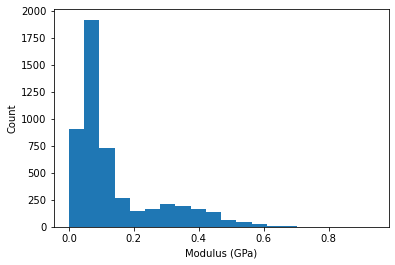

In [93]:
#Normalize modulus based on solid geometry
normalized_mod=mod0[:,1]/slope

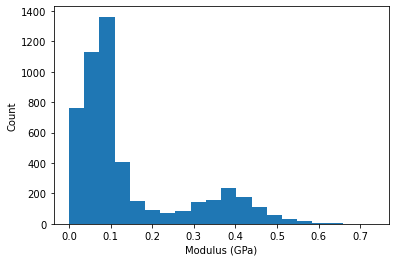

In [94]:
a=plt.hist(normalized_mod, bins=20)
plt.xlabel('Modulus (GPa)')
plt.ylabel('Count')
plt.show()

In [95]:
density=pd.read_csv("./0-1000/density.csv")

In [96]:
data=pd.concat([density, pd.DataFrame(normalized_mod, columns=['Normalized Modulus']),pd.DataFrame(os.listdir('./images'),columns=['Filename'])], axis=1)

In [37]:
data = pd.DataFrame(normalized_mod, columns=['Normalized Modulus'])

In [97]:
data.to_csv('C:/Users/sabri/Desktop/LAMM/leaf_stylegan/MD/data_v3.csv', index=False)
#data.to_csv('C:/Users/sabri/Desktop/LAMM/leaf_stylegan/GA/stress_strain_GA/moduli.CSV', index=False)

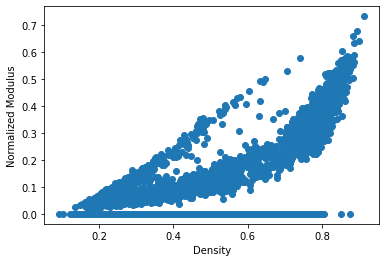

In [136]:
fig, ax = plt.subplots()

ax.scatter(data['density'], data['Normalized Modulus'])

ax.set_xlabel('Density')
ax.set_ylabel('Normalized Modulus')


plt.show()
    
plt.close()

In [203]:
data=pd.read_csv('C:/Users/sabri/Desktop/LAMM/leaf_stylegan/GA/data_v3.csv')

In [204]:
data

,unit,density,mod_norm,Filename
0,0,0.449097,0.091720,0000_smoothed.png
1,1,0.239075,0.071529,0001_smoothed.png
2,2,0.334167,0.085433,0002_smoothed.png
3,3,0.825378,0.411382,0003_smoothed.png
4,4,0.426392,0.079227,0004_smoothed.png
...,...,...,...,...
4995,4995,0.378174,0.083176,4995_smoothed.png
4996,4996,0.296326,0.132388,4996_smoothed.png
4997,4997,0.385742,0.093868,4997_smoothed.png
4998,4998,0.363464,0.106047,4998_smoothed.png


In [206]:
data=data.drop(columns='Filename')

In [212]:
data

,density,mod_norm
0,0.449097,0.091720
1,0.239075,0.071529
2,0.334167,0.085433
3,0.825378,0.411382
4,0.426392,0.079227
...,...,...
4995,0.378174,0.083176
4996,0.296326,0.132388
4997,0.385742,0.093868
4998,0.363464,0.106047


In [211]:
data.drop(data[data.mod_norm == 0].index, inplace=True)

In [215]:
data.to_csv('C:/Users/sabri/Desktop/LAMM/leaf_stylegan/MD/data_v3_drop_zeros.csv', index=False)

In [213]:
data_np=data.to_numpy()

In [214]:
data_np.shape

(4295, 2)

In [216]:
top_pop = data_np[:,1][50:100]

In [218]:
top_pop[25]

0.063571699

In [149]:
data_np=data_np.reshape(6930)

In [222]:
pd.DataFrame(os.listdir(f'C:/Users/sabri/Desktop/LAMM/leaf_stylegan/GA/img_{folder}/top_pop/'))

,0
0,0.png
1,1.png
2,10.png
3,11.png
4,12.png
5,13.png
6,14.png
7,15.png
8,16.png
9,17.png


In [126]:
sorted=np.argsort(-top_mod)

In [192]:
sorted[30:40]

array([17,  9, 21, 48, 49, 18, 40, 11,  6, 31], dtype=int64)

In [166]:
data_np[sorted[71:80]]

array([-0.16270936, -0.16271013, -0.16271031, -0.1627118 , -0.16515815,
       -0.16515875, -0.16516149, -0.16516149, -0.16516167])

In [231]:
os.listdir('C:/Users/sabri/Desktop/LAMM/leaf_stylegan/bone_leaf/style_mixing/test')

['111-111.png',
 '111-139.png',
 '139-139.png',
 '139-540.png',
 '540-540.png',
 '87-87.png',
 'Picture2.png',
 'Picture3.png',
 'Picture4.png',
 'unit']